# Bayesian Statistic

베이지안 정리는 정규 분포와 마찬가지로 통계학에서 가장 중요한 개념중 하나이다.

베이즈 정리는 다음과 같다

$p(H|E) = \frac {p(E|H)p(H)} {p(E)}$

여기서 $H$는 가설(Hypothesis)이며 $E$는 증거(Evidence)이다 경우에 따라서 $D$ (Data)라고 표현하기도 한다.

베이즈 정리의 왼쪽항을 살펴보면 증거가 주어졌을때 가설이 맞을 확률이다. 즉 제시된 데이터를 바탕으로 가설의 신빙성을 파악할수 있다는 것이다.

또한, 베이즈 정리의 오른쪽 항의 분모를 살펴보면

$p(E) = \sum_{i=1}^n p(E,H_i) = \sum_{i=1}^n p(E|H_i)p(H_i)$

즉 $p(E)$는 각각의 가설일때 $E$일 확률을 더한것과 마찬가지이다. 

이렇게 베이즈 정리이용하여 데이터가 주어졌을때 데이터의 파라미터(평균, 분산 등)을 추정할수 있다.

이러한 추정을 베이지언 추정(Bayesian Estimation)이라고 부른다.

베이지언 추정 $p(H|E)$는 오른쪽 식의 분자에 비례한다. 이를,

$p(H|E) \propto p(E|H)p(H)$ 라고 표현할 수 있다.

또한 각각의 확률을 함수형태로 보았을 때,

$posteriori \propto likelihood-function \cdot priori$ 라고 표현한다.

$priori$ 는 데이터가 관측되기 이전에 가설의 분포에 대한 **가정**이다.

$likelihood-function$은 주어진 가설하에 데이터가 분포할 확률이다.

$posteriori$는 관련있다고 생각되는 데이터가 주어졌을 때, 가설의 분포이다. 즉 조건부 확률이다.

따라서 우리의 목표는 $posterior$를 최대화하는(maximum a posteriori) 가설의 특정 값을 **추정**하는 것이다.

베이즈 정리의 활용법은 [나이브 베이즈](http://www.iglee.net/study/28/)를 참조하길 바란다.(추후 업데이트 예정)

## Maximum Likelihood

그러나 데이터를 이용하여 바로 가설을 추정하는 것은 힘들어 보인다.

$posteriori$는 오른쪽 항의 $likelihood-function$에 비례하므로 만약 가설이 균등하게(Uniformly) 분포한다면

$posteirori \propto likelihood-function$ 이다. 따라서 $likelihood-funtion$의 값이 최대화 될때를 찾아보자


## Maximum Likelihood for Gaussian

$likelihood-funtion$ 이 최대화 될 때는, 주어진 데이터 $X$에 대해 어떤 $\theta$값에서 $p(X)$가 최대화 될때이다.

따라서 $\theta$ 값을 찾아보도록 하자.

일변수 정규분포(Univariate Gaussian)은 분산이 1이고 평균이 $\theta$일때, 다음과 같은 식을 따른다.

$N(x|\theta,1) = \frac {1} {\sqrt{2\pi}^{1/2}} exp(-\frac {1} {2}(x - \theta)^2)$

$N$개의 데이터가 존재할때 확률은 다음과 같이 변한다

$N(x|\theta,1) = \frac {1} {\sqrt{2\pi}^{1/2}} \prod^N_{i=1}exp(-\frac {1} {2}(x_i - \theta)^2)$

$\prod$를 exp안에 넣으면 $\sum$으로 변한다. $N(x|\theta,1) = \frac {1} {\sqrt{2\pi}^{1/2}} exp(-\frac {1} {2}\sum^N_{i=1}(x_i - \theta)^2)$

양변에 자연로그를 취해서 $X$값을 최대화 시키는 $\theta$값을 찾아보자. 로그를 취하더라도 최대값이 되는 지점은 변하지 않는다.

$ln(N(X|\theta)) = -\frac {1} {2} \sum^N_{i=1}(x_i - \theta)^2$

x_i에 대한 함수는 이차항이 -인 이차함수 이므로 미분하여 기울기가 0일때의 값이 최대값임을 확인할 수 있다.

$\frac {1} {\delta\theta} \sum(x_i^2 - 2\theta x_i + \theta^2) = 0$이므로  $\frac {1} {\delta\theta} \sum(2x_i - 2\theta)  = 0$이고

$\sum x_i = \sum \theta = N\theta$ 이기 때문에 결론적으로 X를 최대화시키는 $\theta$는

$\theta = \frac {1} {N} \sum x_i$ 임을 확인할 수 있다. 이는 표본평균과 동일하며 $\bar {X}$로 표시하기도 한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

c:\python27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


평균이 $(0,0)$이고 분산이 $I$인 정규분포로 부터 데이터를 뽑아보자

In [2]:
I = np.identity(2, dtype=np.float32)
np.random.seed(0)
data1 = np.random.multivariate_normal([0,0],I, 50).T

In [9]:
mean = data1.sum(axis=1)
mean = mean/50

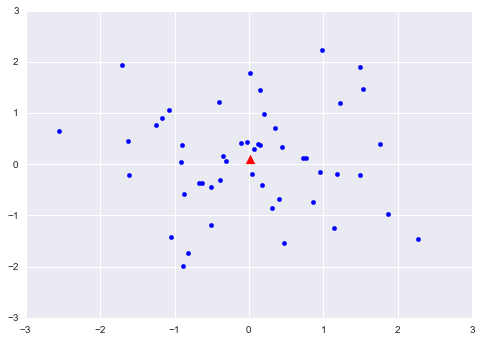

In [14]:
plt.scatter(data1[0,:], data1[1,:], color='blue')
plt.scatter(mean[0], mean[1], color='red', marker=u'^', s=80)
plt.show()

In [11]:
print mean

[ 0.01680616  0.10280987]


평균값이 모평균 $(0,0)$과 일치하지는 않지만 매우 가깝다는 것을 확인할 수 있다